<a href="https://colab.research.google.com/github/afif-af/hanson_ml_scikitlearn_tensorflow/blob/main/chapter04handson_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# regression

In [71]:
import numpy as np
import matplotlib.pyplot as plt


In [72]:
np.random.seed(42)

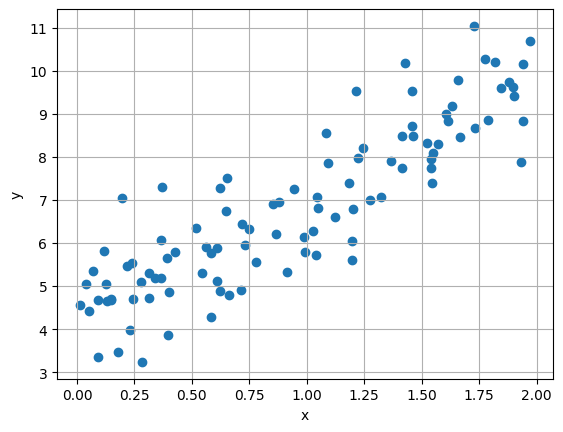

In [73]:
m = 100
x = 2*np.random.rand(m,1)
y = 4 + 3*x + np.random.randn(m,1)

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [74]:
from sklearn.preprocessing import add_dummy_feature

x_b = add_dummy_feature(x)
theta_best=np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

In [75]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [76]:
x_new=np.array([[0],[2]])
x_new_b=add_dummy_feature(x_new)
y_predict=x_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

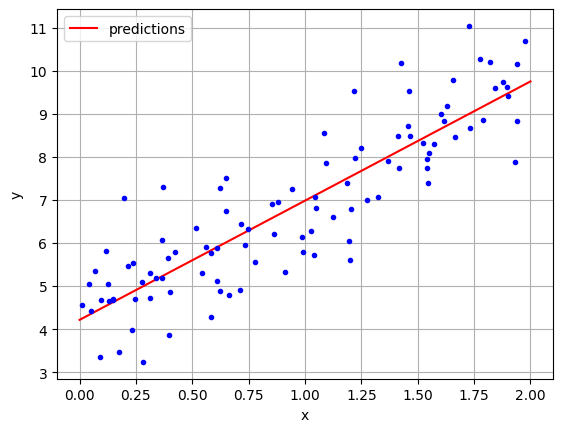

In [77]:
plt.plot(x_new, y_predict,"r-",label="predictions")
plt.plot(x,y,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [79]:
lin_reg.predict(x_new)

array([[4.21509616],
       [9.75532293]])

In [80]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [81]:
np.linalg.pinv(x_b)@ y

array([[4.21509616],
       [2.77011339]])

In [82]:
eta=0.1
n_epochs=1000
m=len(x_b)

In [83]:
np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients=2/m*x_b.T@(x_b@theta -y)
  theta=theta-eta*gradients

In [84]:
theta

array([[4.21509616],
       [2.77011339]])

#stochastic gradient descent

In [85]:
n_epochs=50
t0, t1=5, 50

def learning_schedule(t):
  return t0/(t+t1)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index=np.random.randint(m)
    xi=x_b[random_index:random_index +1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T @ (xi@theta -yi) # for SGD, do not divide by m
    eta=learning_schedule(epoch*m+iteration)
    theta=theta-eta*gradients

In [86]:
theta

array([[4.21076011],
       [2.74856079]])

In [87]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,
                     n_iter_no_change=100, random_state=42)
sgd_reg.fit(x,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [88]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [89]:
np.random.seed(42)
m=100
x=6*np.random.rand(m,1)-3
y=0.5 * x**2 +x +2 + np.random.randn(m,1)



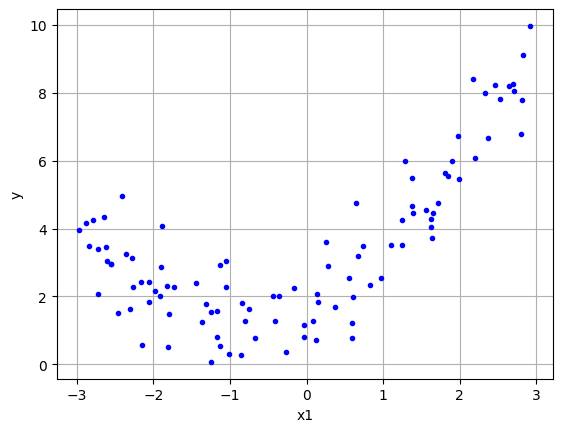

In [90]:
plt.plot(x,y,"b.")
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [91]:
from sklearn.preprocessing import  PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
x_poly=poly_features.fit_transform(x)
x[0]

array([-0.75275929])

In [92]:
x_poly[0]

array([-0.75275929,  0.56664654])

In [93]:
lin_reg= LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

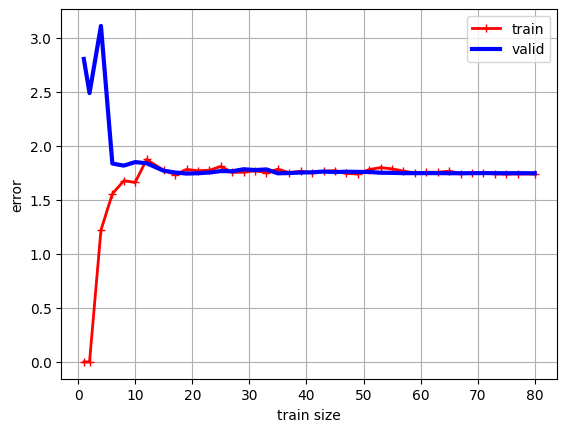

In [94]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores=learning_curve(
    LinearRegression(), x, y, train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring='neg_root_mean_squared_error'
)
train_errors= -train_scores.mean(axis=1)
valid_errors= -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors,'r-+',linewidth=2,label='train')
plt.plot(train_sizes,valid_errors,'b-',linewidth=3,label='valid')

plt.legend()
plt.xlabel('train size')
plt.ylabel('error')
plt.grid()
plt.show()

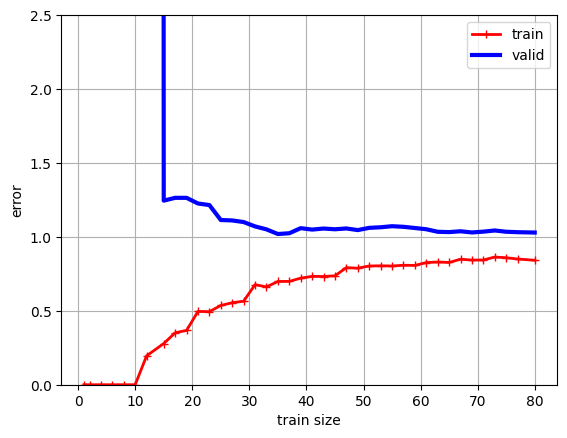

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve


polynomial_regression=make_pipeline(PolynomialFeatures(degree=10,include_bias=False),
                                    LinearRegression())
train_sizes, train_scores, valid_scores=learning_curve(
    polynomial_regression, x, y, train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errors= -train_scores.mean(axis=1)
valid_errors= -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors,'r-+',linewidth=2,label='train')
plt.plot(train_sizes,valid_errors,'b-',linewidth=3,label='valid')

plt.ylim(0, 2.5)
plt.legend()
plt.xlabel('train size')
plt.ylabel('error')
plt.grid()
plt.show()

In [96]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [97]:
sgd_reg=SGDRegressor(max_iter=1000,penalty="l2",alpha=0.1/m,tol=None,
                     eta0=0.01,random_state=42)
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

In [98]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [99]:
sgd_reg=SGDRegressor(max_iter=1000,penalty="l1",alpha=0.1,tol=None,
                     eta0=0.01,random_state=42)
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([4.77557733])

In [100]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])


array([4.78114505])

In [101]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42) # split the quadratic dataset

In [106]:
preprocessing = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

In [111]:
for epoch in range(n_epochs):
  sgd_reg.partial_fit(X_train_prep, y_train.ravel())
  y_valid_predict = sgd_reg.predict(X_valid_prep)
  val_error = mean_squared_error(y_valid, y_valid_predict)
  if val_error < best_valid_rmse:
    best_valid_rmse = val_error
    best_model = deepcopy(sgd_reg)

#Logistic regression

In [112]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [113]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [114]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [116]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=iris.data[["petal width (cm)"]].values
y=iris.target_names[iris.target]=='virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)


LogisticRegression(random_state=42)

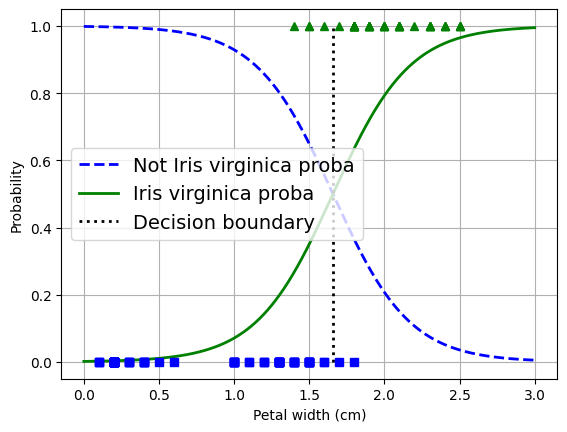

In [120]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
label="Decision boundary")

plt.plot(X_train[y_train==0], y_train[y_train==0], "bs")
plt.plot(X_train[y_train==1], y_train[y_train==1], "g^")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left", fontsize=14)
plt.grid()
plt.show()

In [122]:
decision_boundary

np.float64(1.6576576576576576)

In [123]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

#softmax

In [124]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
softmax_reg=LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=30, random_state=42)

In [126]:
softmax_reg.predict([[5,2]])


array([2])

In [127]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])